## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
#Loading dataset
data = pd.read_csv("indian_liver_patient.csv")

df=data_raw.describe()
df.to_csv('cardio.csv')
df = pd.DataFrame(data)

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.shape

(583, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### Null Values

In [6]:
#Showing column wise %ge of NaN values they contains
null_col = []
for i in df.columns:
    print(i, df[i].isna().mean()*100)
    if df[i].isna().mean()*100 > 0:
        null_col.append(i)

Age 0.0
Gender 0.0
Total_Bilirubin 0.0
Direct_Bilirubin 0.0
Alkaline_Phosphotase 0.0
Alamine_Aminotransferase 0.0
Aspartate_Aminotransferase 0.0
Total_Protiens 0.0
Albumin 0.0
Albumin_and_Globulin_Ratio 0.6861063464837049
Dataset 0.0


> Filling null values of column *Albumin_and_Globulin_Ratio* with mean of column (as it is only column with few Nan values)

In [7]:
for i in null_col:
    df[i] = df[i].fillna(df[i].mean())

# lets check for null values again
for i in df.columns:
    print(i, df[i].isna().mean()*100)

Age 0.0
Gender 0.0
Total_Bilirubin 0.0
Direct_Bilirubin 0.0
Alkaline_Phosphotase 0.0
Alamine_Aminotransferase 0.0
Aspartate_Aminotransferase 0.0
Total_Protiens 0.0
Albumin 0.0
Albumin_and_Globulin_Ratio 0.0
Dataset 0.0


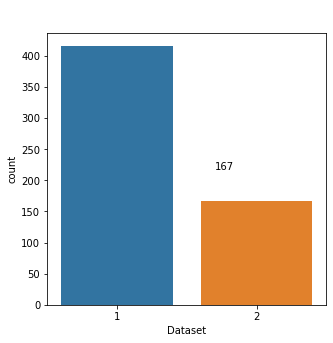

In [8]:
# Checking dataset balance or not

plt.figure(figsize=(5,5))
ax = sns.countplot(x='Dataset', data=df)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


> The bar graph easily shows how data is imbalanced. Less than 30% data is in class . So, first, we have to balance the data in to get more precise predictions.

> For that I am using Over sampling it may have over fitting but under sampling result in low accurate.

### Over sampling

In [9]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()
x, y = oversample.fit_resample(df.drop(['Dataset'], axis=1), df['Dataset'])

new_df = pd.DataFrame(x, columns=df.drop(['Dataset'], axis=1).columns)
new_df['Dataset'] = y

new_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


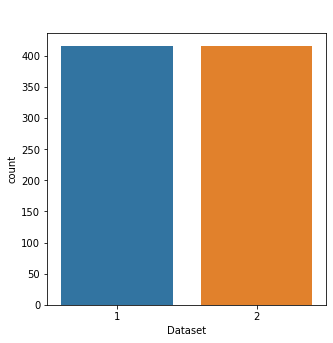

In [10]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='Dataset', data=new_df)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


> Here we can see that all the classes are balanced.

### Lebel Encoding Gender

In [11]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
new_df['Gender'] = enc.fit_transform(new_df['Gender'].astype('str'))

In [12]:
new_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [13]:
new_df.shape

(832, 11)

In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         832 non-null    int64  
 1   Gender                      832 non-null    int32  
 2   Total_Bilirubin             832 non-null    float64
 3   Direct_Bilirubin            832 non-null    float64
 4   Alkaline_Phosphotase        832 non-null    int64  
 5   Alamine_Aminotransferase    832 non-null    int64  
 6   Aspartate_Aminotransferase  832 non-null    int64  
 7   Total_Protiens              832 non-null    float64
 8   Albumin                     832 non-null    float64
 9   Albumin_and_Globulin_Ratio  832 non-null    float64
 10  Dataset                     832 non-null    int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 68.4 KB


> Since due to over sampling some of columns get converted in *objec* type, lets convert them back in numericals

In [15]:
for i in new_df.select_dtypes(include=['object']).columns:
    new_df[i] = new_df[i].astype(str).astype(float)

### Correlation Matrix

<AxesSubplot:>

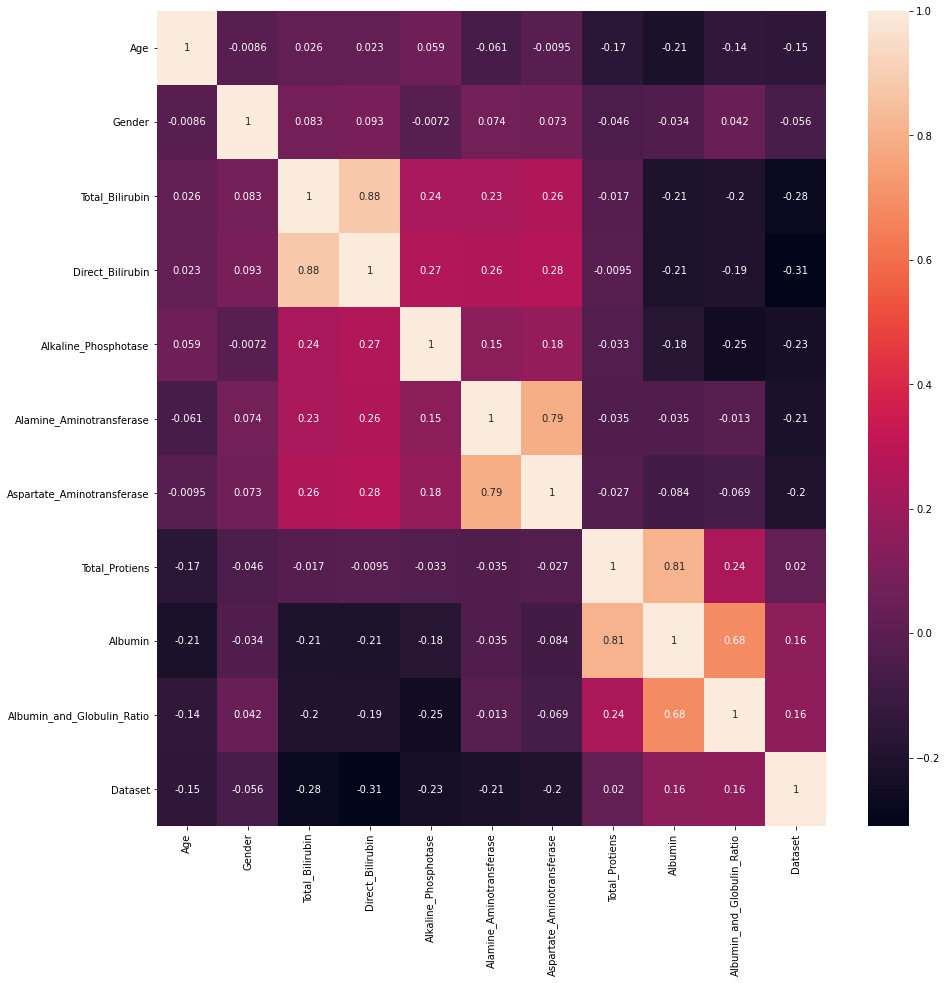

In [16]:
cormap = new_df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cormap, annot = True)

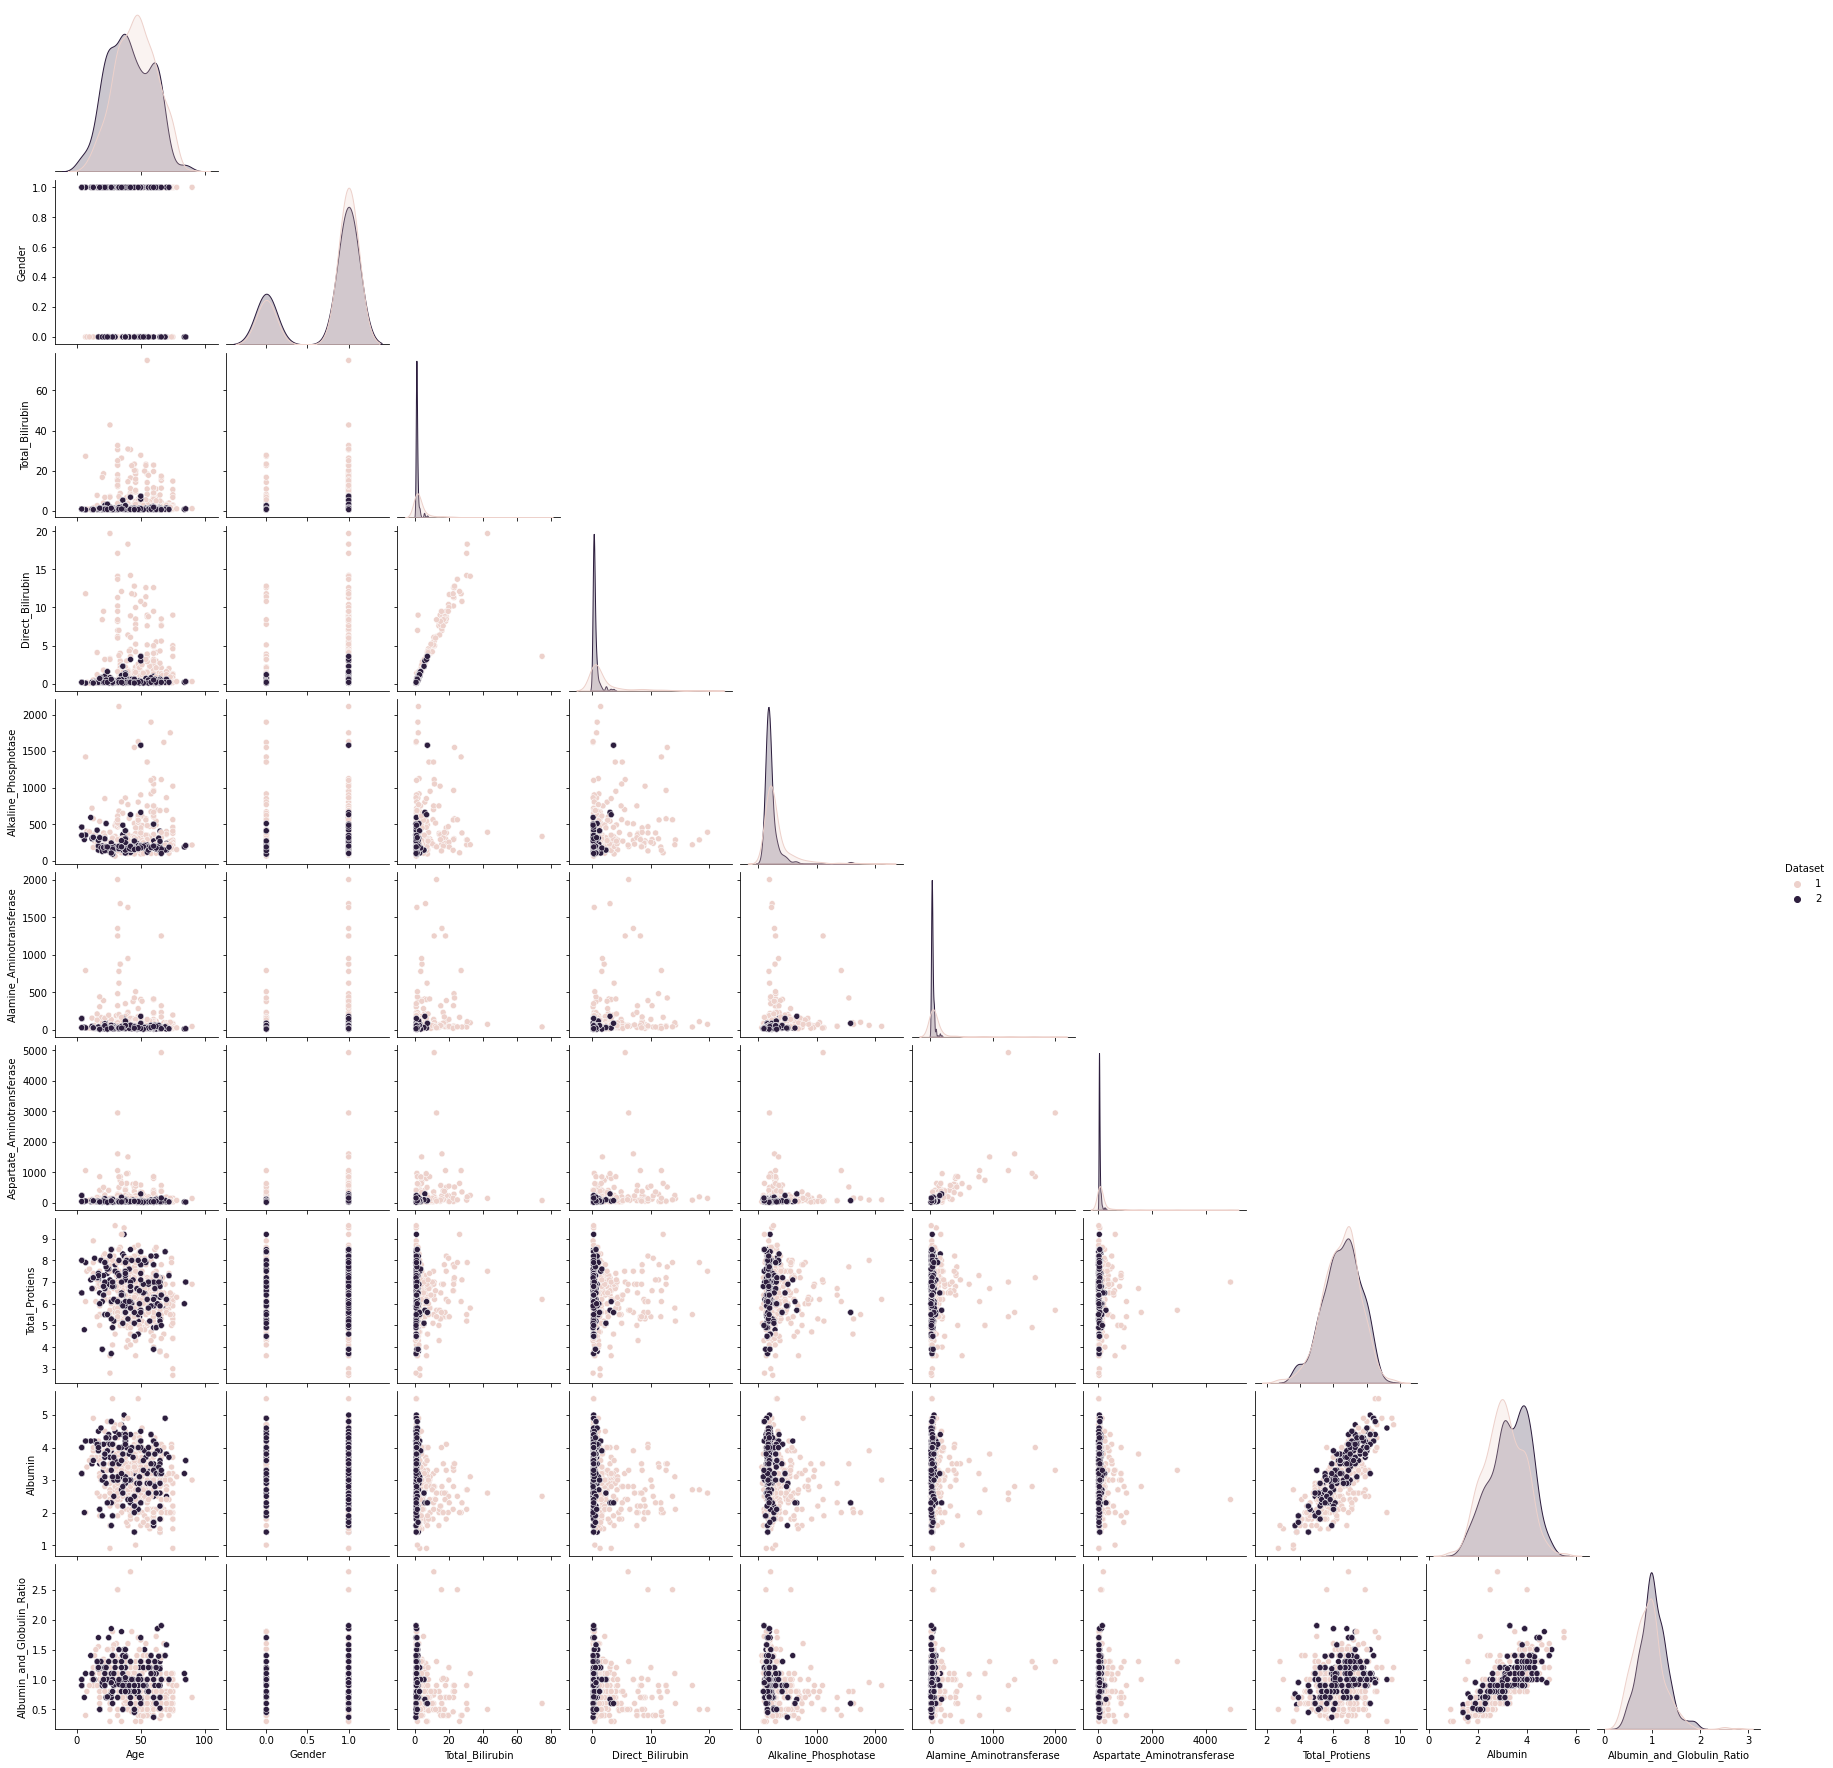

In [17]:
# Pair plot
sns.pairplot(data=new_df, hue='Dataset', corner=True)

## **KNN**

In [18]:
X = new_df.drop(['Dataset'], axis=1)
y = new_df['Dataset']

In [20]:
X.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000
mean,43.640625,0.754808,2.677764,1.173197,267.673077,66.506010,89.758413,6.481010,3.186178,0.963730
std,16.589964,0.430460,5.316799,2.417902,221.886971,154.914269,244.626252,1.096203,0.797145,0.304998
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,32.000000,1.000000,0.700000,0.200000,168.000000,22.000000,24.000000,5.800000,2.600000,0.800000
50%,43.500000,1.000000,0.900000,0.300000,196.000000,31.000000,38.000000,6.600000,3.200000,1.000000
75%,57.000000,1.000000,1.900000,0.900000,282.000000,54.000000,71.000000,7.200000,3.800000,1.100000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [19]:
print("\nInfo\n")
print(X.info())
print("\nMaximum\n")
print(X.max())
print("\nMinimum\n")
print(X.min())



Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         832 non-null    int64  
 1   Gender                      832 non-null    int32  
 2   Total_Bilirubin             832 non-null    float64
 3   Direct_Bilirubin            832 non-null    float64
 4   Alkaline_Phosphotase        832 non-null    int64  
 5   Alamine_Aminotransferase    832 non-null    int64  
 6   Aspartate_Aminotransferase  832 non-null    int64  
 7   Total_Protiens              832 non-null    float64
 8   Albumin                     832 non-null    float64
 9   Albumin_and_Globulin_Ratio  832 non-null    float64
dtypes: float64(5), int32(1), int64(4)
memory usage: 61.9 KB
None

Maximum

Age                             90.0
Gender                           1.0
Total_Bilirubin                 75.0
Direct_Bilirubin 

In [19]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.285741,-1.743225,-0.362680,-0.432877,-0.376569,-0.325199,-0.292878,0.268194,0.098981,-0.252136
1,1.106555,0.573649,1.558454,1.803330,2.049838,-0.014999,0.042570,0.917387,-0.025606,-0.762470
2,1.106555,0.573649,0.880407,1.223573,1.059371,-0.040849,-0.088336,0.453677,0.098981,-0.284032
3,0.867642,0.573649,-0.306176,-0.308643,-0.400264,-0.338124,-0.284696,0.268194,0.223567,0.066822
4,1.703840,0.573649,0.240029,0.353937,-0.338656,-0.254112,-0.125154,0.731903,-1.022300,-1.846929


### Spliting Dataset into train and test set

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

### Model Training

In [21]:
model= KNN()   
model.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### Hyper parameter tunning

In [23]:
from sklearn.model_selection import GridSearchCV
n_neighbors = [x for x in range(5, 86, 2)]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']

grid = {'n_neighbors': n_neighbors,
        'algorithm': algorithm,
        'weights': weights}

In [24]:
new_model = KNN() 

knn_grid = GridSearchCV(estimator = new_model, param_grid = grid, cv = 7, verbose=0)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
                                         45, 47, 49, 51, 53, 55, 57, 59, 61, 63, ...],
                         'weights': ['uniform', 'distance']})

In [25]:
knn_grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 17, 'weights': 'distance'}

<AxesSubplot:>

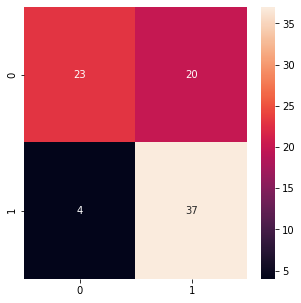

In [26]:
y_pred = knn_grid.best_estimator_.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mat, annot = True)

In [27]:
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Accuracy Score 0.7142857142857143
Classification report:               precision    recall  f1-score   support

           1       0.85      0.53      0.66        43
           2       0.65      0.90      0.76        41

    accuracy                           0.71        84
   macro avg       0.75      0.72      0.71        84
weighted avg       0.75      0.71      0.70        84



### Saving Model

In [28]:
import pickle
pickle.dump(knn_grid.best_estimator_, open("Liver_disease.sav", 'wb'))

### Loading Model

In [29]:
import joblib
loaded_model = joblib.load("Liver_disease.sav")

In [30]:
X.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'],
      dtype='object')

In [31]:
df=pd.read_csv("indian_liver_patient.csv",usecols=['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio',"Dataset"])

df.tail(2)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.0,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.5,2


In [32]:
df=pd.read_csv("indian_liver_patient.csv",usecols=['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'])
df["Gender"]=1
df["Gender"]=1
X1=[df.iloc[581].values]
X2=[df.iloc[582].values]

In [33]:
print("X1 if person who is having liver problem:\n",X1)
print("\nX1 prediction is: ",loaded_model.predict(X1))

X1 if person who is having liver problem:
 [array([ 31. ,   1. ,   1.3,   0.5, 184. ,  29. ,  32. ,   6.8,   3.4,
         1. ])]

X1 prediction is:  [1]


> X1 prediction is 1 means person having liver disease